In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### About the dataset
The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution.
<br>
#### Input Variable
1 - age (numeric)
<br>
2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                       "blue-collar","self-employed","retired","technician","services") 
                                       <br>
                                       
3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
<br>
4 - education (categorical: "unknown","secondary","primary","tertiary")
<br>
5 - default: has credit in default? (binary: "yes","no")
<br>
6 - balance: average yearly balance, in euros (numeric) 
<br>
7 - housing: has housing loan? (binary: "yes","no")
<br>
8 - loan: has personal loan? (binary: "yes","no")
#### related with the last contact of the current campaign:
9 - contact: contact communication type (categorical: "unknown","telephone","cellular") 
<br>
10 - day: last contact day of the month (numeric)
<br>
11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
<br>
12 - duration: last contact duration, in seconds (numeric)
#### other attributes:
13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
<br>
14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
<br>
15 - previous: number of contacts performed before this campaign and for this client (numeric)
<br>
16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

In [2]:
df = pd.read_csv("Bank_marketing.csv")

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,999,0,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,no
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,no


In [4]:
df.shape

(32950, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32950 entries, 0 to 32949
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          32950 non-null  int64 
 1   job          32950 non-null  object
 2   marital      32950 non-null  object
 3   education    32950 non-null  object
 4   default      32950 non-null  object
 5   housing      32950 non-null  object
 6   loan         32950 non-null  object
 7   contact      32950 non-null  object
 8   month        32950 non-null  object
 9   day_of_week  32950 non-null  object
 10  duration     32950 non-null  int64 
 11  campaign     32950 non-null  int64 
 12  pdays        32950 non-null  int64 
 13  previous     32950 non-null  int64 
 14  poutcome     32950 non-null  object
 15  y            32950 non-null  object
dtypes: int64(5), object(11)
memory usage: 4.0+ MB


In [6]:
df.isnull().sum()

age            0
job            0
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
y              0
dtype: int64

In [7]:
df.describe()

,age,duration,campaign,pdays,previous
count,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000
mean,40.014112,258.127466,2.560607,962.052413,0.174719
std,10.403636,258.975917,2.752326,187.951096,0.499025
min,17.000000,0.000000,1.000000,0.000000,0.000000
25%,32.000000,103.000000,1.000000,999.000000,0.000000
50%,38.000000,180.000000,2.000000,999.000000,0.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000
max,98.000000,4918.000000,56.000000,999.000000,7.000000


In [8]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [9]:
# Checking for any duplicates value in the dataset
df.duplicated().sum()

8

In [10]:
# dropping the duplilcates value 
df.drop_duplicates(inplace=True)

In [11]:
df.duplicated().sum()

0

In [12]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

### Exploratory Data Analysis

In [13]:
# Checking the value counts of target
df['y'].value_counts()

no     29230
yes     3712
Name: y, dtype: int64

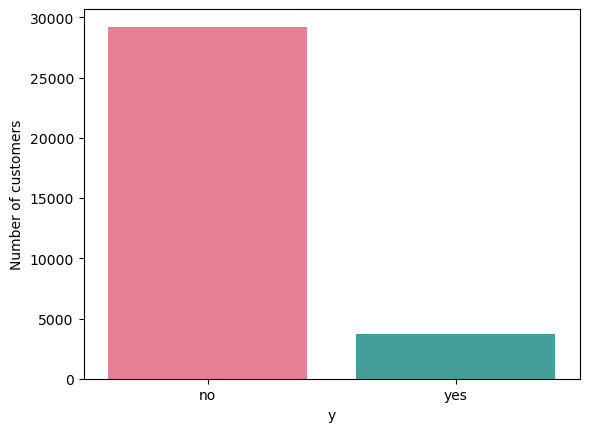

In [14]:
sns.countplot(data=df, x='y', palette="husl")
plt.ylabel("Number of customers")
plt.show()

This is highly imbalanced datasets.

##### Univariate Analysis

In [21]:
cols = ['job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'poutcome']

job


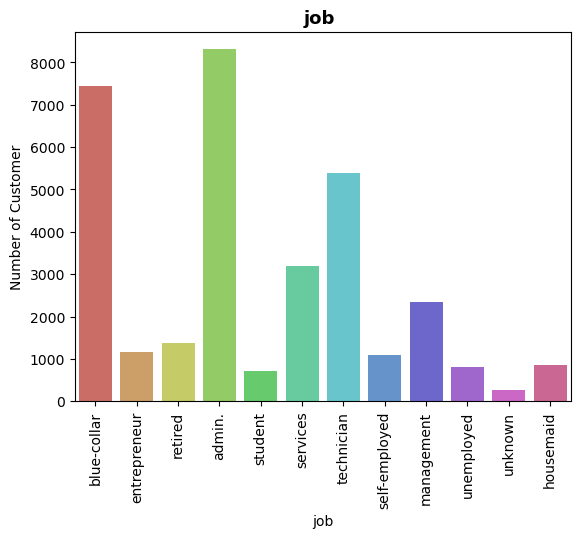

marital


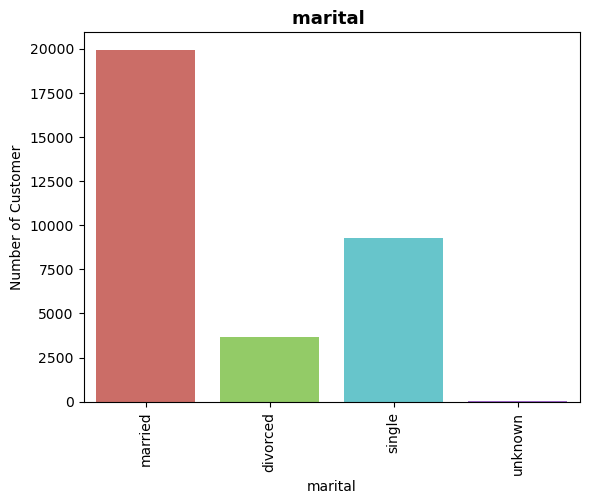

education


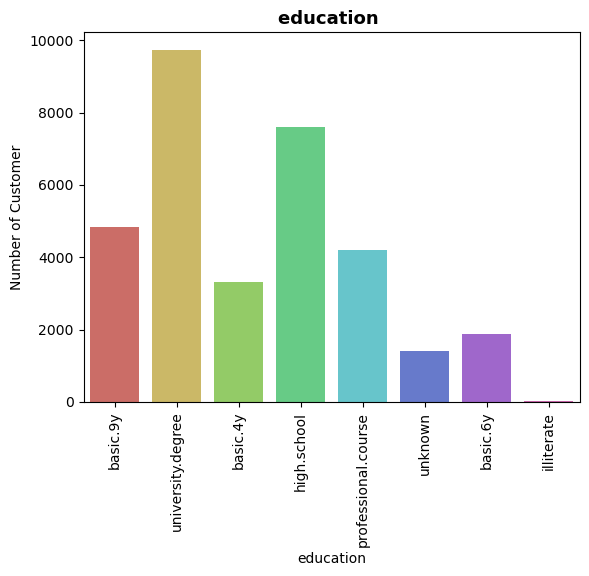

default


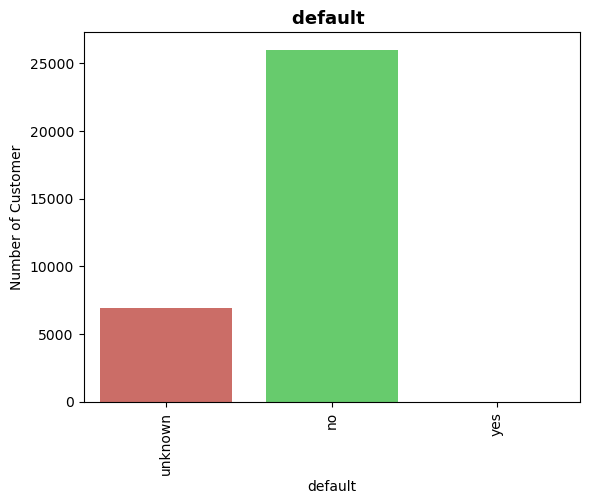

housing


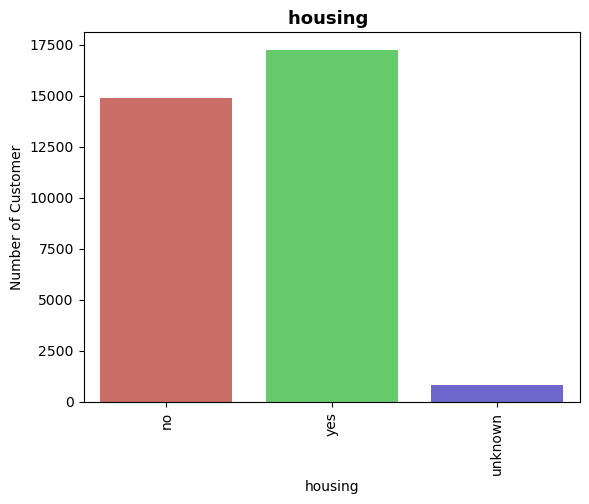

loan


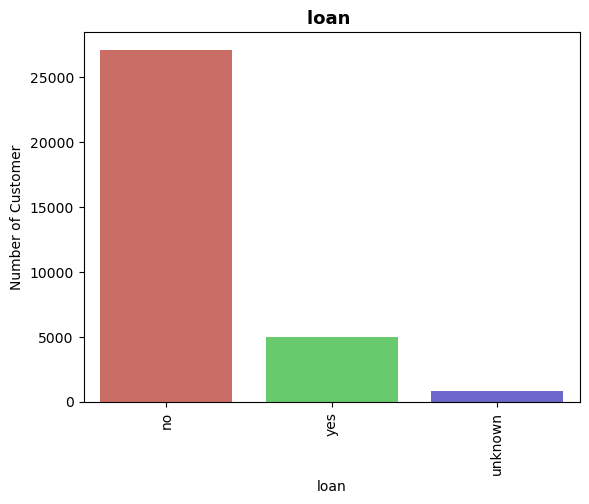

contact


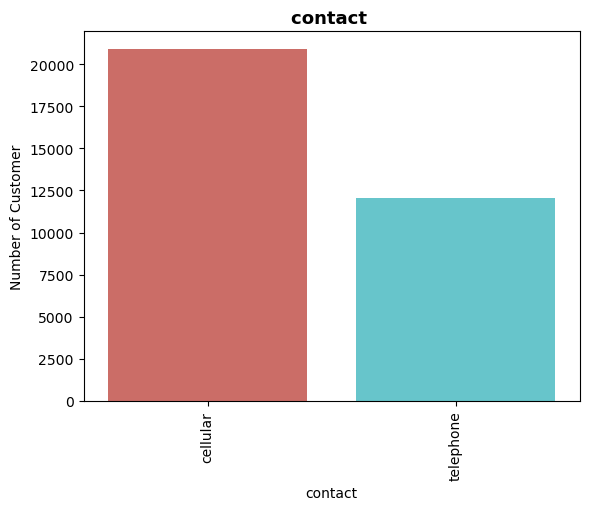

month


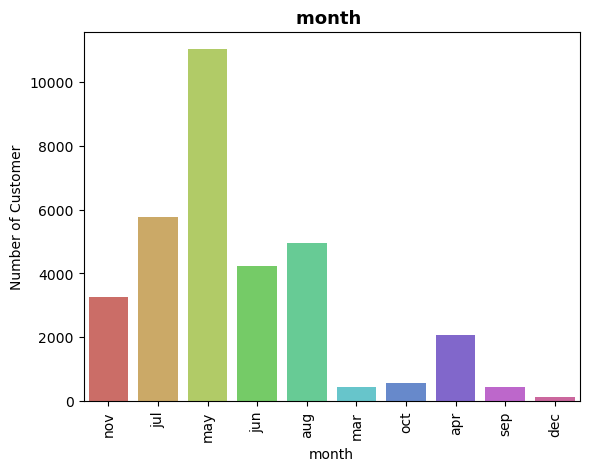

day_of_week


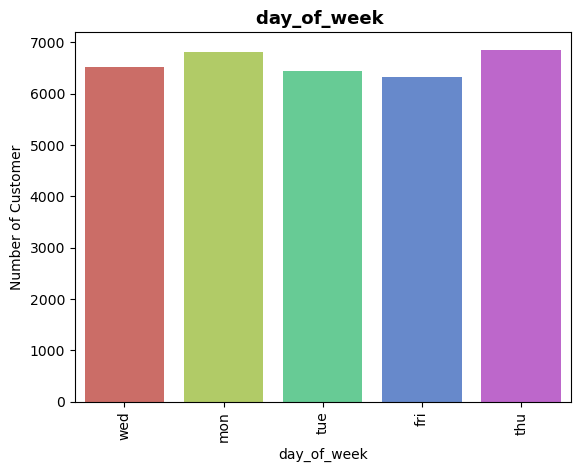

poutcome


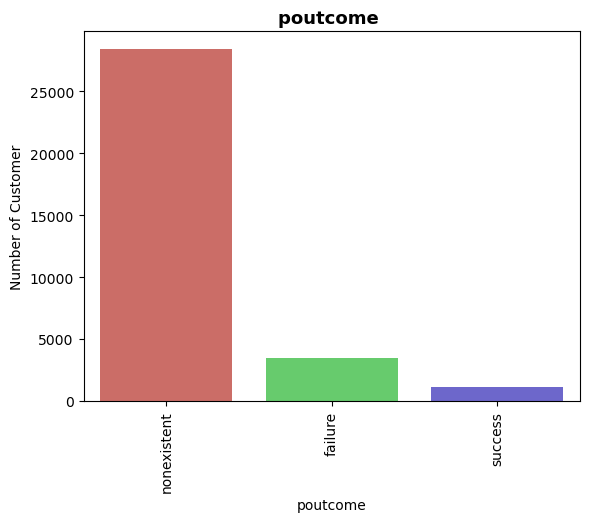

In [16]:
# plt.figure(figsize=(15,23))
for i in cols:
    print(i)
    sns.countplot(data=df, x=i, palette='hls')
    plt.xticks(rotation=90)
    plt.title(f"{i} ",fontsize=13, fontweight="black")
    plt.ylabel("Number of Customer")
    plt.show()


We can see that profession of admin profession has largest number of customers followed by profession of blue-collar and technician.
<br>
<br>
Married people are the largest customeres followed by single people.
<br>
<br>
Majority of the customers hold university degree and then second comes the customers having high school degree.
<br>
<br>
As we can see from the above majority of the customers do not have a default in credits.
<br>
<br>
Cell phone is the most favored for reaching out to the customers.
<br>


In [17]:
num_cols = df.select_dtypes(include="number").columns.to_list()
num_cols

['age', 'duration', 'campaign', 'pdays', 'previous']

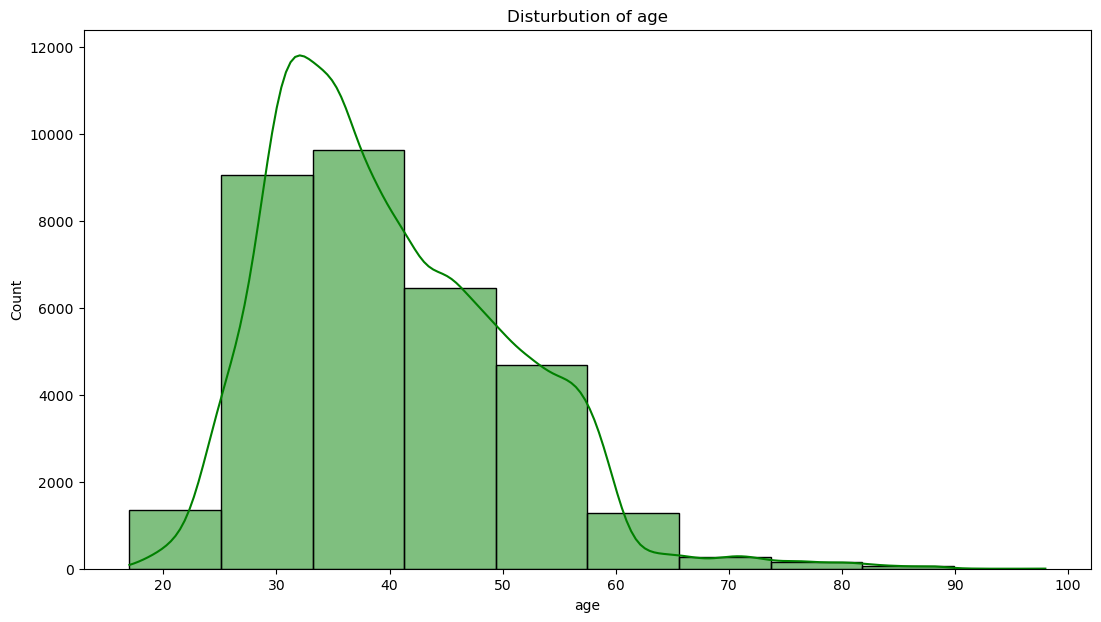

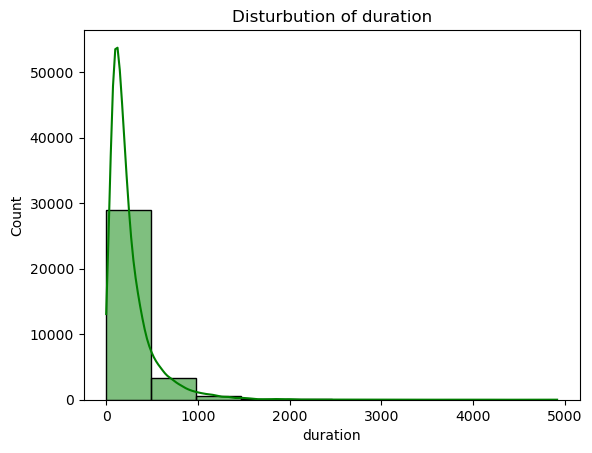

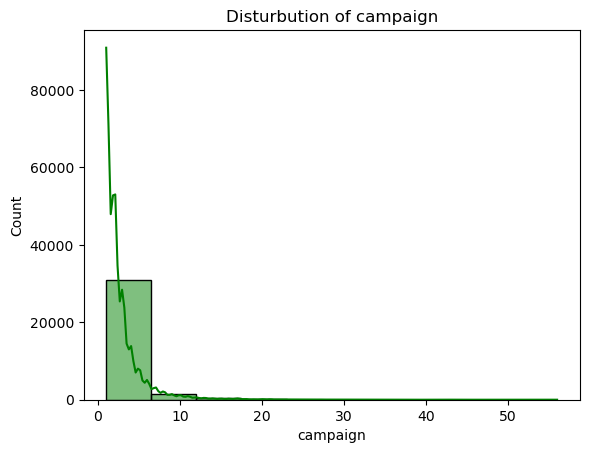

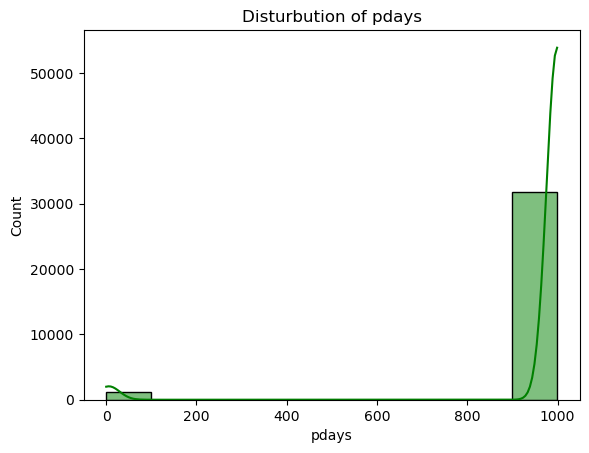

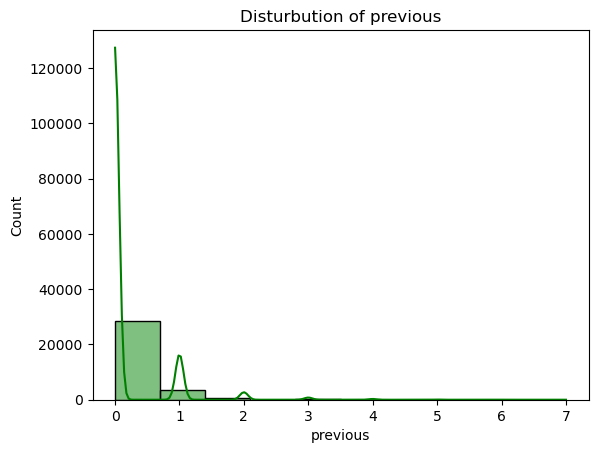

<Figure size 640x480 with 0 Axes>

In [18]:
plt.figure(figsize=(13,7))
for cols in (num_cols):
    sns.histplot(df, x=cols, kde=True, bins=10, color="green")
    plt.title(f"Disturbution of {cols}")
    plt.show()
plt.tight_layout()
plt.show()

From the above distribution we can see that most of the customers are between 30 to 45 years.

##### Bivariate analysis

job


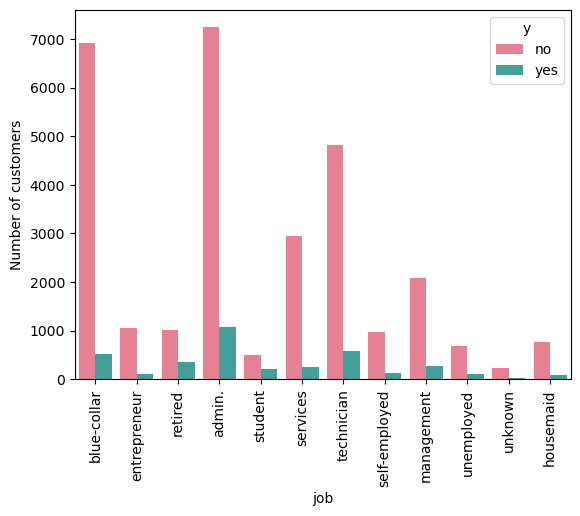

marital


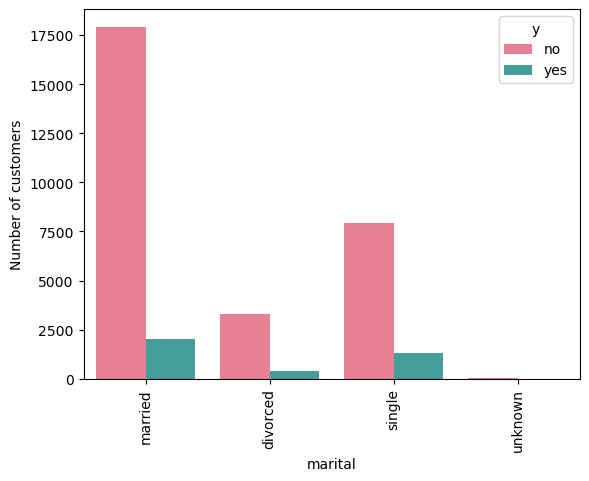

education


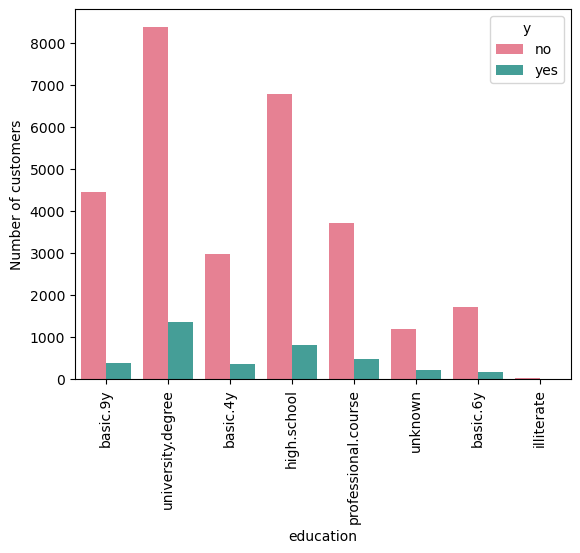

default


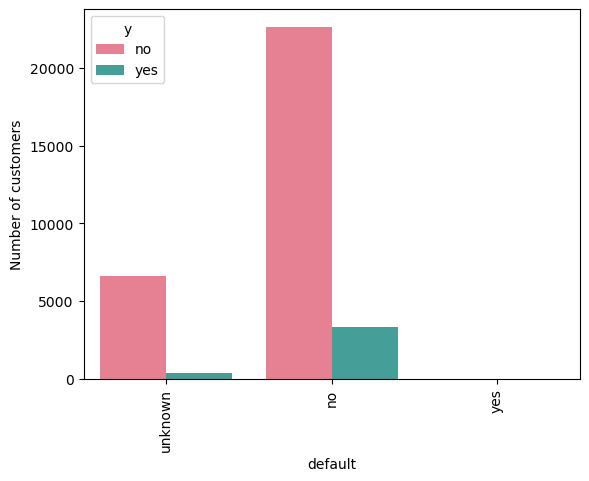

housing


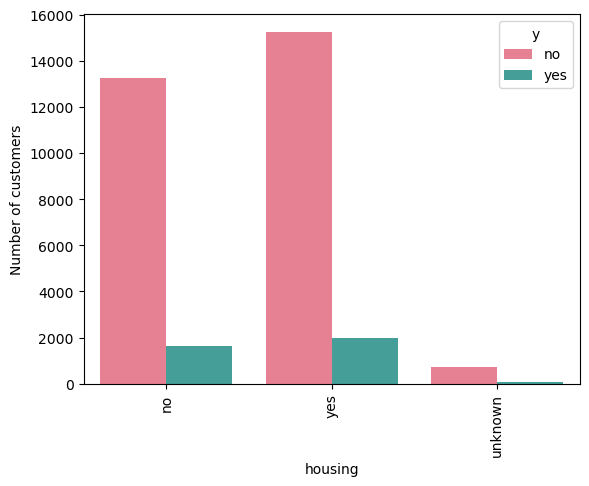

loan


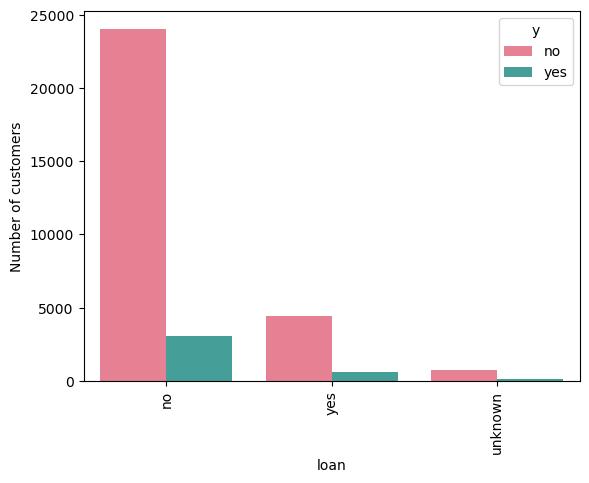

contact


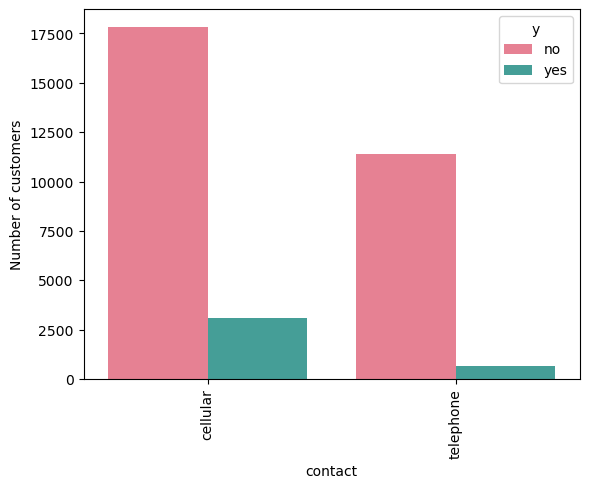

month


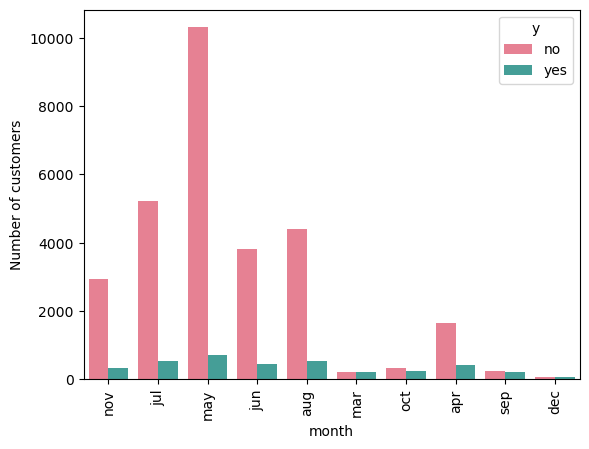

day_of_week


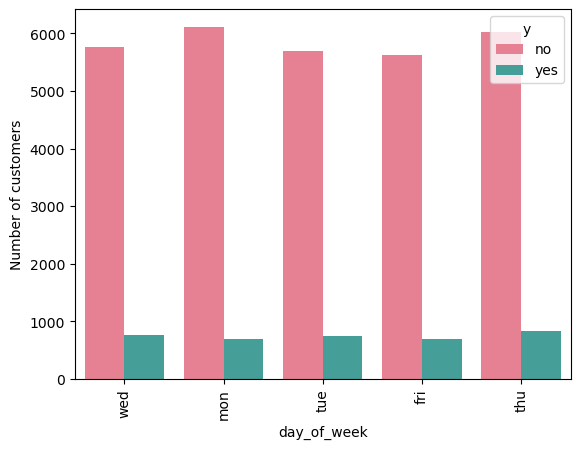

poutcome


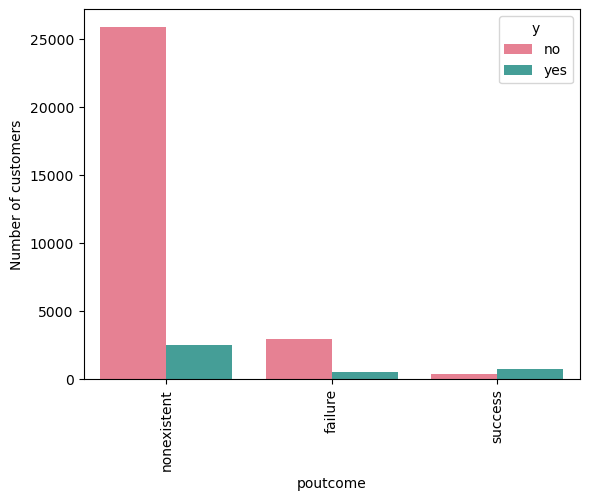

In [22]:
for i in cols:
    print(i)
    sns.countplot(data=df, x=i, hue="y",palette="husl")
    plt.ylabel("Number of customers")
    plt.xticks(rotation=90)
    plt.show()

##### Multivariate Analysis

In [23]:
from sklearn.preprocessing import LabelEncoder

In [24]:
le = LabelEncoder()
df["y"] = le.fit_transform(df["y"])

In [25]:
num_col = df.select_dtypes(include="number").columns.to_list()

In [26]:
num_col

['age', 'duration', 'campaign', 'pdays', 'previous', 'y']

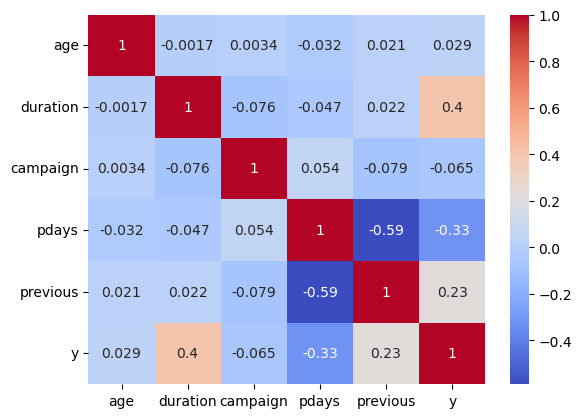

In [27]:
corr = df[num_col].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.show()

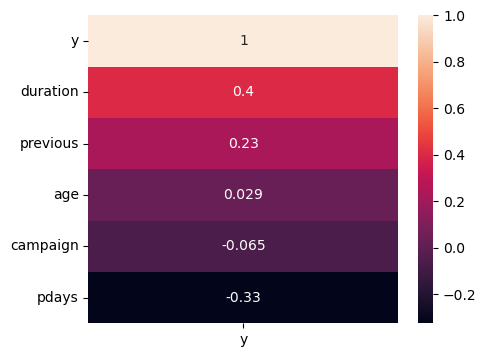

In [28]:
plt.figure(figsize=(5,4))
corr = df[num_col].corr()['y'].to_frame().sort_values(by="y", ascending=False)
sns.heatmap(corr, annot=True)
plt.show()

In [29]:
import scipy.stats as stats

In [31]:
def cramers_v(confusion_matrix):
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))


cramer_vs = {}

for col in cols:
    confusion_matrix = pd.crosstab(df[col], df['y'])
    cramer_vs[col] = cramers_v(confusion_matrix.values)

c_corr = pd.DataFrame({'Features': list(cramer_vs.keys()), 'Correlation value': list(cramer_vs.values())})

c_corr.sort_values(by="Correlation value",ascending=False,ignore_index=True)

,Features,Correlation value
0,poutcome,0.320401
1,month,0.272758
2,job,0.150501
3,contact,0.143052
4,default,0.098867
5,education,0.069447
6,marital,0.057030
7,day_of_week,0.016468
8,housing,0.005942
9,loan,0.000000


#### Encoding Categorical features

In [32]:
from category_encoders.cat_boost import CatBoostEncoder

In [33]:
cb_encoder = CatBoostEncoder()
encoded_df = cb_encoder.fit_transform(df[cols], df['y'])
df[cols] = encoded_df

In [34]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,0.112683,0.112683,0.112683,0.112683,0.112683,0.112683,0.112683,0.112683,0.112683,227,4,999,0,0.112683,0
1,37,0.112683,0.056341,0.112683,0.112683,0.056341,0.056341,0.112683,0.056341,0.056341,202,2,999,1,0.112683,0
2,78,0.112683,0.037561,0.112683,0.056341,0.037561,0.037561,0.056341,0.112683,0.112683,1148,1,999,0,0.056341,1
3,36,0.112683,0.278171,0.056341,0.370894,0.112683,0.278171,0.056341,0.112683,0.556341,120,2,999,0,0.370894,0
4,59,0.556341,0.112683,0.037561,0.278171,0.278171,0.222537,0.370894,0.112683,0.112683,368,2,999,0,0.278171,0


In [35]:
X = df.drop("y", axis=1)
y = df["y"]

In [45]:
X.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome
0,49,0.112683,0.112683,0.112683,0.112683,0.112683,0.112683,0.112683,0.112683,0.112683,227,4,999,0,0.112683
1,37,0.112683,0.056341,0.112683,0.112683,0.056341,0.056341,0.112683,0.056341,0.056341,202,2,999,1,0.112683
2,78,0.112683,0.037561,0.112683,0.056341,0.037561,0.037561,0.056341,0.112683,0.112683,1148,1,999,0,0.056341
3,36,0.112683,0.278171,0.056341,0.370894,0.112683,0.278171,0.056341,0.112683,0.556341,120,2,999,0,0.370894
4,59,0.556341,0.112683,0.037561,0.278171,0.278171,0.222537,0.370894,0.112683,0.112683,368,2,999,0,0.278171


In [77]:
y.head()

0    0
1    0
2    1
3    0
4    0
Name: y, dtype: int32

In [40]:
# for handling the imbalenced datasets
from imblearn.under_sampling import RandomUnderSampler

In [41]:
under_sampler = RandomUnderSampler()
X_res, y_res = under_sampler.fit_resample(X, y)

In [42]:
X_res.shape

(7424, 15)

In [43]:
y_res.shape

(7424,)

#### Model Building

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
X_train,X_test,y_train,y_test=train_test_split(X_res ,y_res ,test_size=0.2, random_state=0)

In [48]:
X_train.shape

(5939, 15)

In [50]:
X_test.shape

(1485, 15)

In [51]:
y_train.shape

(5939,)

In [52]:
y_test.shape

(1485,)

In [53]:
from sklearn.tree import DecisionTreeClassifier

In [67]:
dtree = DecisionTreeClassifier(criterion = "gini",max_depth=8, random_state=0, splitter='random')

In [68]:
dtree

DecisionTreeClassifier(max_depth=8, random_state=0, splitter='random')

In [69]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=8, random_state=0, splitter='random')

In [70]:
from sklearn.metrics import accuracy_score

In [71]:
y_train_pred = dtree.predict(X_train)

In [72]:
print("Accuracy Score of Model on Training Data is =>",round(accuracy_score(y_train,y_train_pred)*100,2),"%")

Accuracy Score of Model on Training Data is => 81.88 %


In [73]:
from sklearn.metrics import classification_report

In [75]:
y_test_pred = dtree.predict(X_test)
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.78      0.82      0.80       744
           1       0.81      0.77      0.79       741

    accuracy                           0.79      1485
   macro avg       0.80      0.79      0.79      1485
weighted avg       0.80      0.79      0.79      1485



In [76]:
print("Accuracy Score of Model on Testing Data  is =>",round(accuracy_score(y_test,y_test_pred)*100,2),"%")

Accuracy Score of Model on Testing Data  is => 79.46 %
